In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from scipy.stats import median_abs_deviation as MAD
from astropy.table import Table

In [12]:
import os
homedir=os.getenv("HOME")

In [37]:
w3_nopsf = Table.read(homedir+'/output_params_W3_nopsf.fits')
w3_psf = Table.read(homedir+'/output_params_W3_psf.fits')
w3_nopsf = w3_nopsf[(w3_nopsf['xc']>0)&(w3_psf['err_flag']==0)]
w3_psf = w3_psf[(w3_psf['xc']>0)&(w3_psf['err_flag']==0)]

In [51]:
w3_rat = w3_psf['re']/w3_nopsf['re']
w3_nopsf['VFID'][w3_rat>2]

VFID0349
VFID1652
VFID1984
VFID3979
VFID4119
VFID6216


In [40]:
r_nopsf = Table.read(homedir+'/output_params_r_nopsf.fits')
r_psf = Table.read(homedir+'/output_params_r_psf.fits')
r_nopsf = r_nopsf[(r_nopsf['xc']>0)&(r_psf['err_flag']==0)]
r_psf = r_psf[(r_psf['xc']>0)&(r_psf['err_flag']==0)]

In [49]:
r_rat = r_psf['re']/r_nopsf['re']
r_nopsf['VFID'][r_rat>2]

VFID0029
VFID0993
VFID1312
VFID1518
VFID2037
VFID3286
VFID3343
VFID4056
VFID4269
VFID4820
VFID4970


In [91]:
d={
    "mult":'*',
    "add":'+',
    "subtr":'-'}

In [97]:
eval('5'+d['mult']+'5')

25

In [605]:
#https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJS/245/25#/article

In [420]:
#sorts in ascending order according to one column's entries
re.sort('prefix')

In [596]:
#no psf case; marked galaxies with GALFIT error flags; allWISE (WXSC) vs. unWISE (me)
#can't easily compare radii; WXSC reports SMA. unsure whether SMA is full diameter and if it
#represents the SMA of the effective radius?

#use w3 magnitude instead. 
eff = re['R3']
my_eff = psf_params_v1['re']*2.75/60

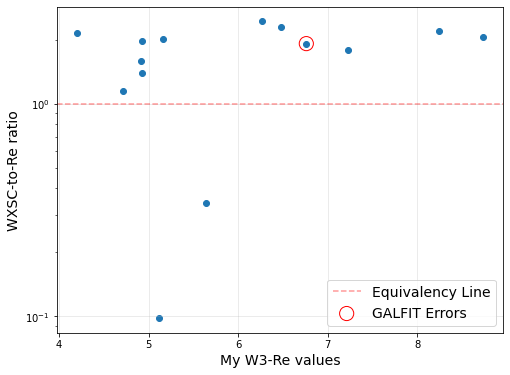

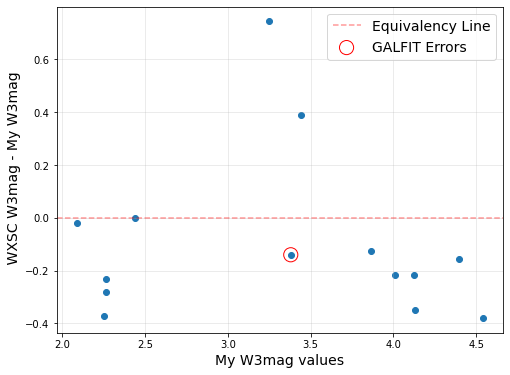

In [603]:
plt.figure(figsize=(8,6))

plt.scatter(eff,eff/my_eff/2)
plt.grid(alpha=0.3)
plt.xlabel('My W3-Re values',fontsize=14)
plt.ylabel('WXSC-to-Re ratio',fontsize=14)
plt.axhline(1,color='r',linestyle='dashed',alpha=0.4, label='Equivalency Line')

err = re_galfit['err_flag']==1
plt.scatter(eff[err],eff[err]/my_eff[err]/2,color='red',s=200,facecolor='None',label='GALFIT Errors')

#plt.ylim(0,40)
plt.yscale('log')
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(re_galfit['mag'],re['W3mag']-re_galfit['mag'])
plt.grid(alpha=0.3)
plt.xlabel('My W3mag values',fontsize=14)
plt.ylabel(' WXSC W3mag - My W3mag',fontsize=14)
#plt.ylim(0,4)

plt.axhline(0,color='r',linestyle='dashed',alpha=0.4,label='Equivalency Line')

plt.scatter(re_galfit['mag'][err],re['W3mag'][err]-re_galfit['mag'][err],
            color='red',s=200,facecolor='None',label='GALFIT Errors')
plt.legend(fontsize=14)
plt.show()

In [ ]:
#psf_params_v1 --> website values
#re_galfit --> Rose's values
#re --> WXSC's values

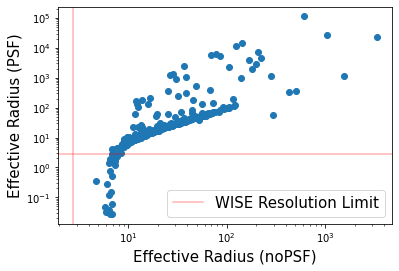

In [75]:
roseparams_nopsf=Table.read(homedir+'/vf_html/all_input_fits/output_params_W3_nopsf.fits')
roseparams_psf=Table.read(homedir+'/vf_html/all_input_fits/output_params_W3_psf.fits')

plt.scatter(roseparams_nopsf['re'][roseparams_psf['re']>0]*2.75,roseparams_psf['re'][roseparams_psf['re']>0]*2.75)
plt.axhline(2.75,color='red',alpha=0.3,label='WISE Resolution Limit')
plt.axvline(2.75,color='red',alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Effective Radius (noPSF)',fontsize=15)
plt.ylabel('Effective Radius (PSF)',fontsize=15)
plt.legend(fontsize=15)


plt.savefig(homedir+'/Desktop/psf_demo.png',dpi=250)

In [1251]:
#now that the nopsf-psf troubles are resolved, time to recreate the comparison plots!
#already trimmed kimparams_* to be same length as roseparams (target) using v2_snrcoadd.fits VFIDs

In [1275]:
#brief psf diagnosis.

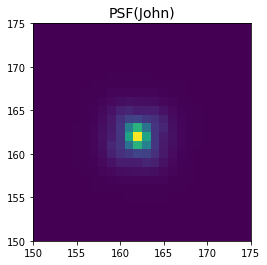

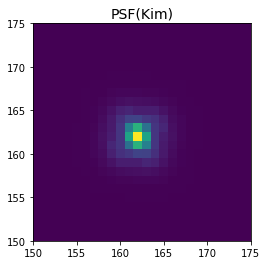

In [1279]:
psf_john=fits.getdata(homedir+'/NGC3691-custom-psf-W3.fits')
psf_kim=fits.getdata(homedir+'/VFID3985-1713p166psf.fits')
plt.imshow(psf_john,origin='lower')
plt.title('PSF(John)',fontsize=14)
plt.xlim(150,175)
plt.ylim(150,175)
plt.show()
plt.imshow(psf_kim,origin='lower')
plt.title('PSF(Kim)',fontsize=14)
plt.xlim(150,175)
plt.ylim(150,175)
plt.show()

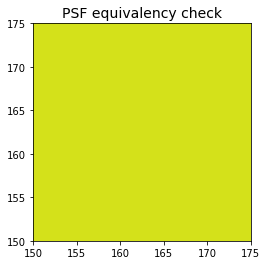

In [1280]:
comp=psf_john/psf_kim
plt.imshow(comp,origin='lower')
plt.xlim(150,175)
plt.ylim(150,175)
plt.title('PSF equivalency check',fontsize=14)
plt.show()

In [1300]:
dum

ID_v1,central_v1,x (px),y (px),central galaxy,ID,RA_ext,DEC_ext,RA_cen,DEC_cen
bytes8,bytes8,int64,int64,bytes8,bytes8,float64,float64,float64,float64
index22,VFID0047,266,272,VFID0047,index22,132.0145,73.5289,131.990334,73.5393333
index188,VFID0816,260,246,VFID0815,index188,213.4575,57.7685,213.473601,57.7714231
index313,VFID1500,227,237,VFID1498,index313,174.4598,47.8807,174.43375650000002,47.893123
index329,VFID1578,100,118,VFID1576,index329,0.0,0.0,177.98854949999998,46.817019
index390,VFID1963,281,313,VFID1961,index390,187.63,41.6993,187.651425,41.6439942
index530,VFID3023,28,50,VFID3020,index530,0.0,0.0,186.9749609949816,28.633638591119713
index560,VFID3244,235,257,VFID3241,index560,135.6739,25.9367,135.6611025,25.9346276
index582,VFID3414,233,233,VFID3411,index582,119.3074,23.7665,119.293473,23.7797771
index690,VFID4168,271,230,VFID4165,index690,175.0386,15.3252,175.0562655,15.3423307
